## Text mining for PR

In [1]:
from nltk.corpus import stopwords
import pandas as pd
import re

## Loading data

In [2]:
mydata = pd.read_excel("Twitter_data.xlsx", index_col = 0)
mydata

,id,author_id,created_at,text,retweet_count,reply_count,like_count,quote_count,username,follower_count,following_count
0,1477769524011315210,826104766161879044,2022-01-02T22:31:24.000Z,@Iovehearts is it a pension scheme with your e...,0,1,0,0,_postpunkdad,674,414
1,1477750903025319937,1433581386112380932,2022-01-02T21:17:25.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,Missy41091460,3,29
2,1477743788793778179,1273894620,2022-01-02T20:49:09.000Z,RT @PRSA_Roadsafety: Let be honest PSV drivers...,4,0,0,0,kiela_w,921,782
3,1477740238323789831,19198704,2022-01-02T20:35:02.000Z,"You’ve heard of the “Great Resignation,” but a...",0,0,2,0,PRSASacramento,2405,1522
4,1477737600479866884,948674925950328833,2022-01-02T20:24:33.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,EliasZakayo300,400,1640
...,...,...,...,...,...,...,...,...,...,...,...
81,1477119968584126464,18586040,2022-01-01T03:30:18.000Z,[USA] Public Relations Sr. Advisor for Infrast...,0,0,0,0,pr_jobs,5833,3295
82,1477100493830864903,436045478,2022-01-01T02:12:55.000Z,RT @DWJr16: It has been my honor to serve as 2...,1,0,0,0,PRSAHealth,2293,1582
83,1477098881880055814,1049005198860009473,2022-01-01T02:06:31.000Z,It has been my honor to serve as 2021 @PRSAHea...,1,0,4,0,DWJr16,146,1135
84,1477095571777155073,9745402,2022-01-01T01:53:22.000Z,"RT @PRSA: As we close out 2021, we want to tak...",5,0,0,0,alaskaegan,498,437


## Preprocessing

In [3]:
# Lower Transformation
mydata["mytext_new"] = mydata['text'].str.lower()
# Remove URLS
mydata["mytext_new"] = mydata["mytext_new"].str.replace(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', 
                                                        '', flags=re.UNICODE, regex = True) 
# Remove Emoticons
mydata["mytext_new"] = mydata["mytext_new"].str.replace("[^\w\s#@/:%.,_-]", '', flags=re.UNICODE, regex = True) 
mydata["mytext_new"] = mydata["mytext_new"].apply(lambda x: re.split("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", str(x))[0])
# Remove Special characters
mydata["mytext_new"] = mydata['mytext_new'].str.replace('[^A-Za-z\s]+', '', regex = True)

# Remove Stopwords
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
mydata["mytext_new"] = mydata["mytext_new"].str.replace(pat, '', regex = True)
mydata["mytext_new"]

0     iovehearts    pension scheme   employer  avc  ...
1     accidentalertk sikikasafety roaddriving ntsake...
2     rt prsaroadsafety let  honest psv drivers    d...
3     youve heard   great resignation    ready    pa...
4     accidentalertk sikikasafety roaddriving ntsake...
                            ...                        
81    usa public relations sr advisor  infrastructur...
82    rt dwjr     honor  serve   prsahealth academy ...
83        honor  serve   prsahealth academy chair\np...
84    rt prsa   close    want  take  opportunity  th...
85    remember  buy  tickets   raffle   win one   th...
Name: mytext_new, Length: 86, dtype: object

## Word Frequency

In [4]:
new_df = mydata["mytext_new"].str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 
new_df = new_df.sort_values(['Frequency'], ascending=False)
new_df

,Word,Frequency
0,year,37
1,rt,36
2,prsa,35
3,prsaroadsafety,28
4,happy,23
...,...,...
276,makes,1
275,vaccination,1
274,melwayj,1
273,learnn,1


## Word Frequency Visuaization

<AxesSubplot:xlabel='Word'>

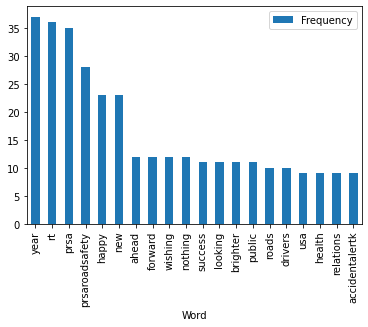

In [5]:
new_df[0:20].plot.bar(x="Word")

## The most-retweeted content (top 10)

In [6]:
mydata.drop_duplicates(subset = ["text"]).sort_values(by=['retweet_count'], ascending=False)[0:10]

,id,author_id,created_at,text,retweet_count,reply_count,like_count,quote_count,username,follower_count,following_count,mytext_new
11,1477677744511201282,424707168,2022-01-02T16:26:42.000Z,RT @PRSA: Happy New Year! Looking forward to a...,11,0,0,0,othatnikkiyoung,1817,2869,rt prsa happy new year looking forward brigh...
69,1477305116378210308,14804281,2022-01-01T15:46:01.000Z,Happy New Year! Looking forward to a brighter ...,11,0,33,4,PRSA,108276,641,happy new year looking forward brighter year...
50,1477383860627386368,350430192,2022-01-01T20:58:55.000Z,RT @NHSLincsCCG: We've opened up more vaccinat...,5,0,0,0,ANPCatherine,149,780,rt nhslincsccg weve opened vaccination slots...
10,1477679205945012227,4042432272,2022-01-02T16:32:31.000Z,"RT @PRSA: As we close out 2021, we want to tak...",5,0,0,0,PRSAGoldCoast,182,153,rt prsa close want take opportunity th...
2,1477743788793778179,1273894620,2022-01-02T20:49:09.000Z,RT @PRSA_Roadsafety: Let be honest PSV drivers...,4,0,0,0,kiela_w,921,782,rt prsaroadsafety let honest psv drivers d...
44,1477468387685113856,705395511155695616,2022-01-02T02:34:48.000Z,Happy New Year! Is earning the APR credential ...,4,2,13,1,PRaccred,1149,311,happy new year earning apr credential newy...
42,1477495792487350272,965008485795627009,2022-01-02T04:23:42.000Z,RT @PRaccred: Happy New Year! Is earning the A...,4,0,0,0,professordavem,595,683,rt praccred happy new year earning apr crede...
18,1477639295485853696,385325759,2022-01-02T13:53:55.000Z,Many feared dead this morning at Musembe along...,2,0,2,1,papafavour,13282,10010,many feared dead morning musembe along webuy...
17,1477640029266657282,1274248967644237825,2022-01-02T13:56:50.000Z,RT @papafavour: Many feared dead this morning ...,2,0,0,0,OuteringRoadKE,2024,1955,rt papafavour many feared dead morning musem...
71,1477293850435764229,2827544733,2022-01-01T15:01:15.000Z,#HappyNewYear to our #PAG members! As we begin...,2,0,6,0,prsa_pag,452,99,happynewyear pag members begin newyear ma...


## The most-liked content (top 10)

In [7]:
mydata.drop_duplicates(subset = ["text"]).sort_values(by=['like_count'], ascending=False)[0:10]

,id,author_id,created_at,text,retweet_count,reply_count,like_count,quote_count,username,follower_count,following_count,mytext_new
69,1477305116378210308,14804281,2022-01-01T15:46:01.000Z,Happy New Year! Looking forward to a brighter ...,11,0,33,4,PRSA,108276,641,happy new year looking forward brighter year...
26,1477570051779792898,550061843,2022-01-02T09:18:46.000Z,@mgmulama @AccidentAlert_K @sikikasafety @road...,0,0,13,0,alex_ngaira,171,109,mgmulama accidentalertk sikikasafety roaddrivi...
44,1477468387685113856,705395511155695616,2022-01-02T02:34:48.000Z,Happy New Year! Is earning the APR credential ...,4,2,13,1,PRaccred,1149,311,happy new year earning apr credential newy...
30,1477560238802931714,4022304202,2022-01-02T08:39:47.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,0,1,7,0,mgmulama,152,51,accidentalertk sikikasafety roaddriving ntsake...
71,1477293850435764229,2827544733,2022-01-01T15:01:15.000Z,#HappyNewYear to our #PAG members! As we begin...,2,0,6,0,prsa_pag,452,99,happynewyear pag members begin newyear ma...
4,1477737600479866884,948674925950328833,2022-01-02T20:24:33.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,EliasZakayo300,400,1640,accidentalertk sikikasafety roaddriving ntsake...
1,1477750903025319937,1433581386112380932,2022-01-02T21:17:25.000Z,@AccidentAlert_K @sikikasafety @road_driving @...,1,0,5,0,Missy41091460,3,29,accidentalertk sikikasafety roaddriving ntsake...
83,1477098881880055814,1049005198860009473,2022-01-01T02:06:31.000Z,It has been my honor to serve as 2021 @PRSAHea...,1,0,4,0,DWJr16,146,1135,honor serve prsahealth academy chair\np...
78,1477152101604200452,436045478,2022-01-01T05:37:59.000Z,Happy New Year to PRSA Health Academy members!...,1,0,4,0,PRSAHealth,2293,1582,happy new year prsa health academy members ...
45,1477464169767133192,41019284,2022-01-02T02:18:02.000Z,"Cheers to 2022! We hope all of our members, sp...",0,0,3,0,PRSADetroit,3946,2502,cheers hope members sponsors partners e...


## The most-talkative users (top 10)

In [8]:
talktive = mydata['username'].value_counts().reset_index()[0:10].rename({"index": "author_id", "author_id": "count"}, axis = 1) 
talktive

,author_id,username
0,pr_jobs,6
1,TorivoJobs,3
2,PRSAHealth,2
3,DWJr16,2
4,UMDearbornPRSSA,2
5,careersingov,2
6,professordavem,2
7,doctrahanmedia,2
8,usakenshin,2
9,LUISMIGUELDARAV,1
